In [66]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data
import scipy


ImportError: cannot import name 'get_db_url' from 'env' (/Users/albertcontreras/codeup-data-science/statistics-exercises/env.py)

## 1) Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
## A sample of 40 sales from office  #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- Load the mpg dataset and use it to answer the following questions:

### a) Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
### b) Are compact cars more fuel-efficient than the average car?
### c) Do manual cars get better gas mileage than automatic cars?

In [7]:
#sample 1
mean1 = 45
sdev1 = 1.9
ssize1 = 1115

#sample 2
mean2 = 49
sdev2= 1.9
ssize2 = 1005

alpha = 0.05
# H_0 : avereage time to sell 1 == average time to sell at office 2

# H-a :average time to sell 2 != average tome t sell at office 2 

In [9]:
x= np.arange(50, 150)
y1= stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)


In [10]:
t, p = scipy.stats.ttest_ind_from_stats(mean1, sdev1, ssize1,mean2,sdev2,ssize2, equal_var=True)

In [11]:
t

-48.40151153554419

In [12]:
p

0.0

In [13]:
alpha = 0.5
ssize1 = 40
mean1 = 90
sdev1 = 15

ssize2 = 50 
sdev2 = 20 
mean2 = 100


In [14]:
t, p = scipy.stats.ttest_ind_from_stats(mean1, sdev1, ssize1,mean2,sdev2,ssize2, equal_var=True)

In [15]:
p

0.01020985244923939

In [16]:
t

-2.6252287036468456

In [17]:
mpg = data('mpg')

In [18]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999? NO

In [19]:
c_2008 = mpg[mpg.year == 2008].hwy
c_1999 = mpg[mpg.year == 1999].hwy

<AxesSubplot:>

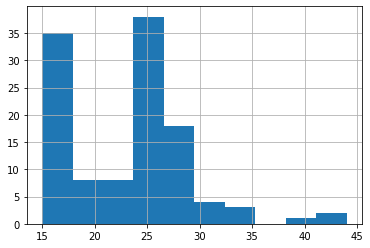

In [20]:
c_1999.hist()

<AxesSubplot:>

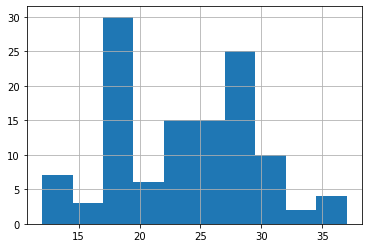

In [21]:
c_2008.hist()

In [22]:
c_2008_cty = mpg[mpg.year == 2008].cty
c_1999_cty = mpg[mpg.year == 1999].cty

<AxesSubplot:>

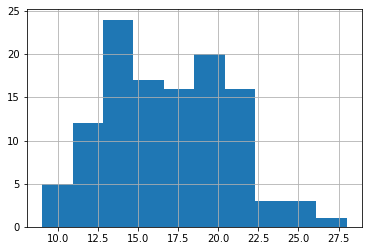

In [23]:
c_2008_cty.hist()

<AxesSubplot:>

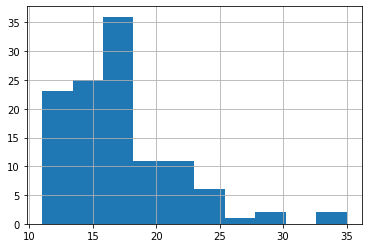

In [24]:
c_1999_cty.hist()

In [25]:
c_2008_cty.var(), c_1999_cty.var()

(16.452844090775127, 19.879015620394938)

In [26]:
c_2008.var(), c_1999.var()

(34.19820218096073, 37.02269378131447)

In [27]:
stats.levene(c_1999,c_2008)

LeveneResult(statistic=0.0212016152523693, pvalue=0.8843574825616618)

In [28]:
t, p = stats.ttest_ind(c_1999,c_2008)
t, p

(-0.03286431672888292, 0.9738110448529322)

In [30]:
mpg['avg_fe']=stats.hmean(mpg[['cty','hwy']],axis=1)

run it as a combined avrg/mean next time with cty and hwy together

### Are compact cars more fuel-efficient than the average car?
- h0 : mpg for compact car <= mpg for the average car
- ha: mpg for compact cars > mpg for the average

In [31]:
compact_cars_cty = mpg[mpg['class'] == 'compact'].avg_fe
compact_cars_cty.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 1      22.212766
2      24.360000
3      24.313725
4      24.705882
5      19.809524
6      21.272727
7      21.600000
8      21.272727
9      19.512195
10     23.333333
11     22.304348
12     18.750000
13     20.238095
14     20.238095
15     18.750000
142    24.360000
143    22.304348
170    22.222222
171    22.978723
172    21.590909
173    22.978723
187    23.625000
188    24.360000
189    25.038462
190    25.735849
191    21.272727
192    21.272727
193    21.600000
194    26.666667
195    27.789474
196    29.836066
197    31.876923
198    29.836066
208    24.360000
209    21.955556
210    24.360000
211    25.019608
212    19.902439
213    37.714286
214    24.360000
215    21.955556
216    25.019608
217    24.360000
218    24.360000
219    24.360000
220    18.871795
221    19.902439
Name: avg_fe, dtype: float64>

<AxesSubplot:>

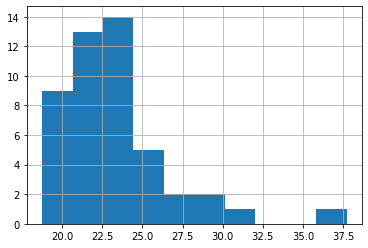

In [32]:
compact_cars_cty.hist()

In [47]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
pop_mean = mpg.avg_fe.mean()

In [48]:
pop_mean

19.585525317633177

In [49]:
fe_compact.mean()

23.500416808701296

In [50]:
t, p = stats.ttest_1samp(compact_cars_cty, pop_mean)
t,p

(7.512360093161354, 1.5617666348807727e-09)

In [51]:
if (p/2 < alpha) and t >0:
    print('reject null')

reject null


### Do manual cars get better gas mileage than automatic cars?

In [52]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [53]:
fe_auto = mpg[mpg.trans.str.contains('auto')].mean
fe_manual = mpg[mpg.trans.str.contains('manual')].mean

In [55]:
fe_auto.var()

AttributeError: 'function' object has no attribute 'var'

In [38]:
de_manual.hist()

NameError: name 'de_manual' is not defined

In [ ]:
fe_auto.var(), fe_manual.var()

In [ ]:
stats.levene(fe_auto,fe_manual)

# Correlation

In [68]:
from env import get_db_url

ModuleNotFoundError: No module named 'env.py'; 'env' is not a package

In [64]:
url = get_db_url('telco_churn')

NameError: name 'get_db_url' is not defined